In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')

# 4.1 
#### Import the csv file of the stock which contained the Bollinger columns as well.
#### Create a new column 'Call' , whose entries are - 

#### 'Buy' if the stock price is below the lower Bollinger band 

#### 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

#### 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

#### 'Short' if the stock price is above the upper Bollinger band

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [2]:
boolinger=pd.read_csv('Boolinger.csv')

In [3]:
boolinger.drop(boolinger.columns[boolinger.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
boolinger = boolinger.dropna()
boolinger = boolinger.reset_index(drop=True)

In [5]:
boolinger.loc[boolinger['Close Price'] < boolinger['Lower Band'], 'Call'] = 'Buy'  
boolinger.loc[(boolinger['Lower Band'] <= boolinger['Close Price']) & (boolinger['Close Price'] < boolinger['rolling_mean']), 'Call'] = 'Hold Buy/ Liquidate Short'
boolinger.loc[(boolinger['rolling_mean'] <= boolinger['Close Price']) & (boolinger['Close Price'] < boolinger['Upper Band']) , 'Call'] = 'Hold Buy/ Liquidate Buy'
boolinger.loc[boolinger['Close Price'] >= boolinger['Upper Band'], 'Call'] = 'Short'  

In [6]:
feature_names=['Close Price','rolling_mean','Upper Band','Lower Band']
X=boolinger[feature_names]
y=boolinger['Call']


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Different Classification Models with Accuracy

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('\033[1m' +'Accuracy of Logistic regression classifier on training set:' + '\033[0m' + '{:.2f}'. format(logreg.score(X_train, y_train)))
print('\033[1m' +'Accuracy of Logistic regression classifier on test set:' + '\033[0m' + '{:.2f}'. format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set:0.94
Accuracy of Logistic regression classifier on test set:0.95


## Decision Tree 

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('\033[1m' +'Accuracy of Decision Tree classifier on training set:' + '\033[0m' + '{:.2f}'. format(clf.score(X_train, y_train)))
print('\033[1m' +'Accuracy of Decision Tree classifier on test set:' + '\033[0m' + '{:.2f}'. format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set:1.00
Accuracy of Decision Tree classifier on test set:0.85


## K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('\033[1m' +'Accuracy of K-NN classifier on training set:' + '\033[0m' + '{:.2f}'. format(knn.score(X_train, y_train)))
print('\033[1m' +'Accuracy of K-NN classifier on test set:' + '\033[0m' + '{:.2f}'. format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set:0.85
Accuracy of K-NN classifier on test set:0.88


## Support Vector Machine

In [11]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('\033[1m' +'Accuracy of SVM classifier on training set:' + '\033[0m' + '{:.2f}'. format(svm.score(X_train, y_train)))
print('\033[1m' +'Accuracy of SVM classifier on test set:' + '\033[0m' + '{:.2f}'. format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set:1.00
Accuracy of SVM classifier on test set:0.56


## Linear Discriminant Analysis

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('\033[1m' +'Accuracy of LDA classifier on training set:' + '\033[0m' + '{:.2f}'. format(lda.score(X_train, y_train)))
print('\033[1m' +'Accuracy of LDA classifier on test set:' + '\033[0m' + '{:.2f}'. format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set:0.90
Accuracy of LDA classifier on test set:0.90


We will apply the Logistic Regression Classifier on our subsequent dataset for prediction.

## Predicting the Call Column for JETAIRWAYS Stock

In [13]:
jet=pd.read_csv('JETAIRWAYS.csv')


In [14]:
df2=pd.DataFrame()
df2['Date']=jet['Date']
df2['Close Price']=jet['Close Price']
df2['rolling_mean']=df2['Close Price'].rolling(window=14).mean()
df2['STD']=df2['Close Price'].rolling(window=14).std()
df2['Upper Band']=df2['rolling_mean'] + 2*(df2['STD'])
df2['Lower Band']=df2['rolling_mean'] - 2*(df2['STD'])

In [15]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)

In [16]:
# Finding the real Call and checking the accuracy of our prediction model
df2.loc[df2['Close Price'] < df2['Lower Band'], 'Call_true'] = 'Buy'  
df2.loc[(df2['Lower Band'] <= df2['Close Price']) & (df2['Close Price'] < df2['rolling_mean']), 'Call_true'] = 'Hold Buy/ Liquidate Short'
df2.loc[(df2['rolling_mean'] <= df2['Close Price']) & (df2['Close Price'] < df2['Upper Band']) , 'Call_true'] = 'Hold Buy/ Liquidate Buy'
df2.loc[df2['Close Price'] >= df2['Upper Band'], 'Call_true'] = 'Short'

In [17]:
df2['Call_pred']=logreg.predict(df2[['Close Price','rolling_mean','Upper Band','Lower Band']])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(df2['Call_true'], df2['Call_pred'])

0.9521829521829522

# 4.2
#### Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 

% change between Open and Close price for the day 

% change between Low and High price for the day 

5 day rolling mean of the day to day % change in Close Price 

5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's.

(-1) if next day's price(Close) is less than present day's.

i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 

i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [19]:
rcom=pd.read_csv('BAJAJELEC.csv')

In [20]:
df=pd.DataFrame()
df['Date']=rcom['Date']
df['OpenClose']=(rcom['Open Price']-rcom['Close Price'])/rcom['Open Price']*100
df['LowHigh']=(rcom['Low Price']-rcom['High Price'])/rcom['Low Price']*100
df['rolling_mean']=(rcom['Close Price'].pct_change()*100).rolling(window=5).mean()
df['rolling_std']=(rcom['Close Price'].pct_change()*100).rolling(window=5).std()
df['Close Price']=rcom['Close Price']
df = df.dropna()
df = df.reset_index(drop=True)


In [21]:
df.loc[df['Close Price'] < df['Close Price'].shift(-1), 'Action'] = float(1)
df.loc[df['Close Price'] > df['Close Price'].shift(-1), 'Action'] = float(-1)
df.drop(df.tail(1).index,inplace=True)
df['Action']=df['Action'].astype(int)

In [22]:
feature_names=['OpenClose','LowHigh','rolling_mean','rolling_std']
X=df[feature_names]
y=df['Action']


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('\033[1m' +'Accuracy of Random Forest classifier on training set:' + '\033[0m' + '{:.2f}'. format(model.score(X_train, y_train)))
print('\033[1m' +'Accuracy of Random Forest classifier on test set:' + '\033[0m' + '{:.2f}'. format(model.score(X_test, y_test)))


Accuracy of Random Forest classifier on training set:0.99
Accuracy of Random Forest classifier on test set:0.54


In [25]:
df3=pd.DataFrame()
df3['Date']=rcom['Date']
df3["Date"]=pd.to_datetime(df3["Date"])
#df3['Daily']=rcom['Close Price'].pct_change()*100
df3['Cumulative']=((rcom['Close Price'].pct_change() + 1).cumprod() - 1)*100


Text(0, 0.5, 'Cumulative Return(%)')

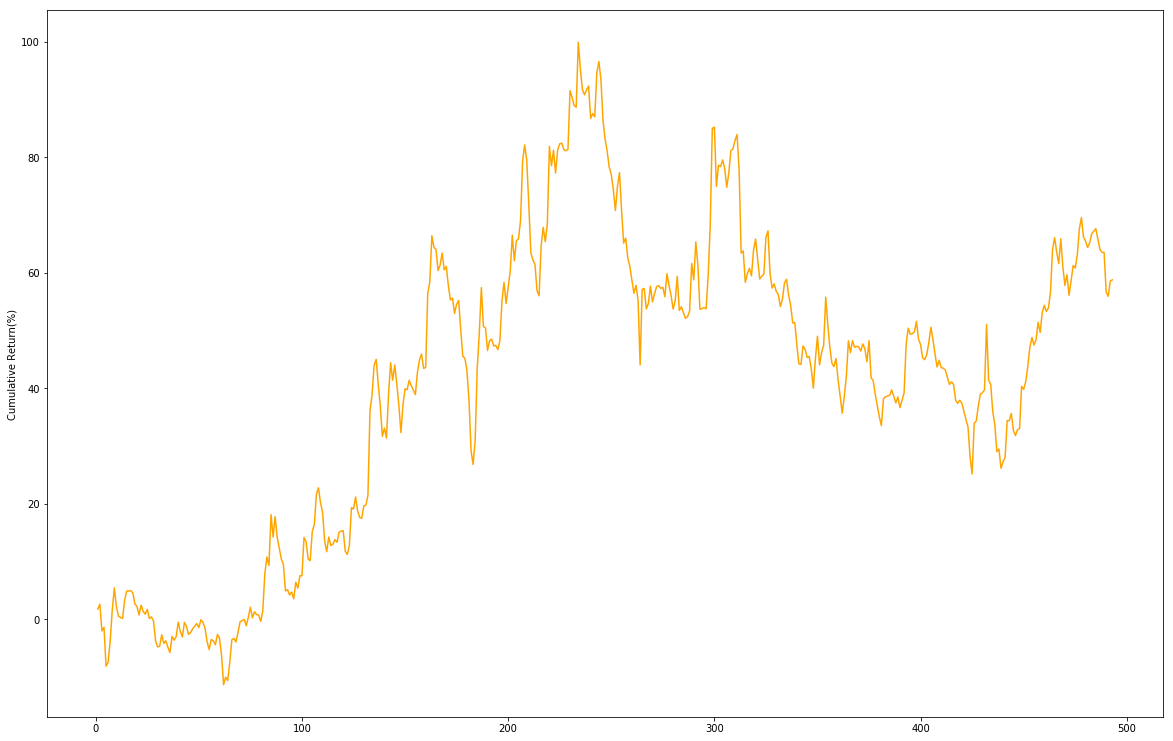

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size
plt.plot(df3['Cumulative'],color='orange')
plt.ylabel('Cumulative Return(%)')